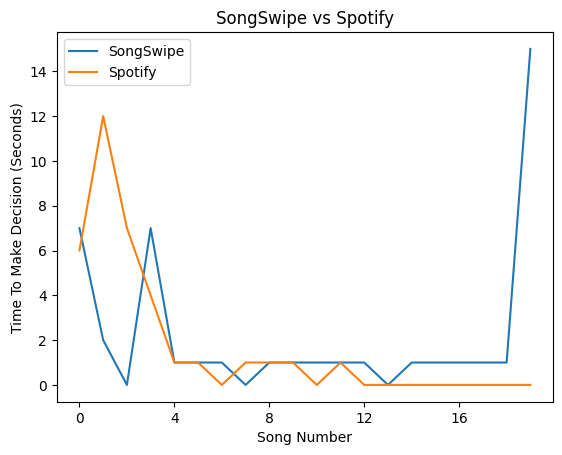

In [ ]:
# Plot for creating time graph
from matplotlib import pyplot as plt
import pandas as pd

ss_df = pd.read_csv('data/<ENTER SONG SWIPE DATA FILE>')
sp_df = pd.read_csv('data/<ENTER_SPOTIFY_DATA_FILE>')

SONG_AMOUNT = len(ss_df['time(Sec)'])
TICK_AMOUNT = 5 

plt.xticks([x * (SONG_AMOUNT/TICK_AMOUNT) for x in range(TICK_AMOUNT+1)])
plt.title('SongSwipe vs Spotify')
plt.xlabel('Song Number')
plt.ylabel('Time To Make Decision (Seconds)')

plt.plot(ss_df['time(Sec)'], label='SongSwipe')
plt.plot(sp_df['time(Sec)'], label='Spotify')
plt.legend()